In [2]:
%pip install matplotlib seaborn pandas numpy


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.8 MB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 30.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 45.4 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 32.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the 

✅ データを正常に読み込みました。

## 1. 災害サブグループ別 死亡者総数 TOP 5 ##
Disaster Subgroup
Climatological    11740060
Biological         9623123
Hydrological       7086023
Geophysical        2501422
Meteorological     1731947
Name: Total Deaths, dtype: int64


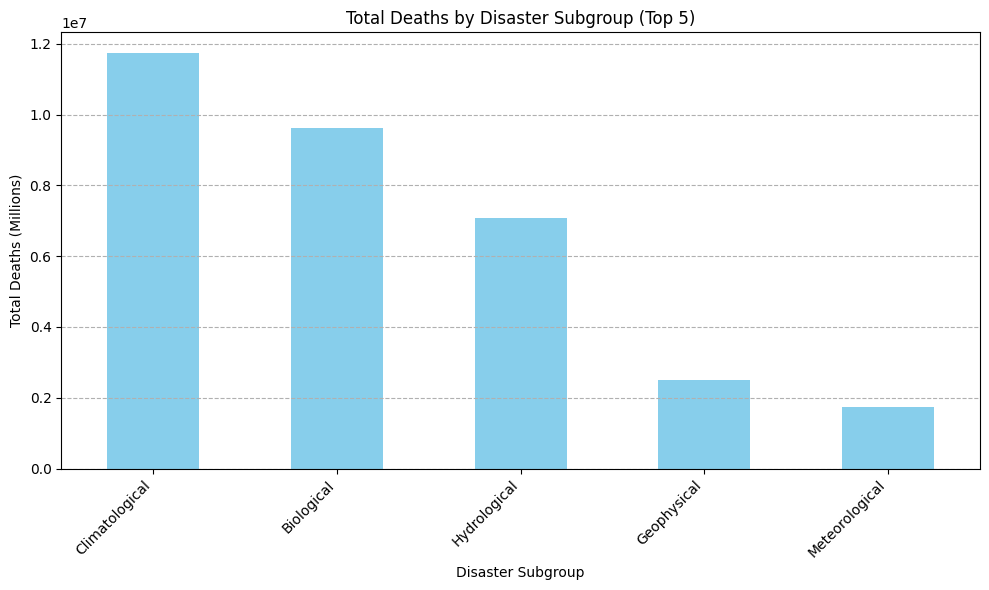


## 2. 日本 (JPN) の年別 死亡者数推移 ##
Start Year
2020     84
2021     62
2022    112
2023     15
2024    270
Name: Total Deaths, dtype: int64


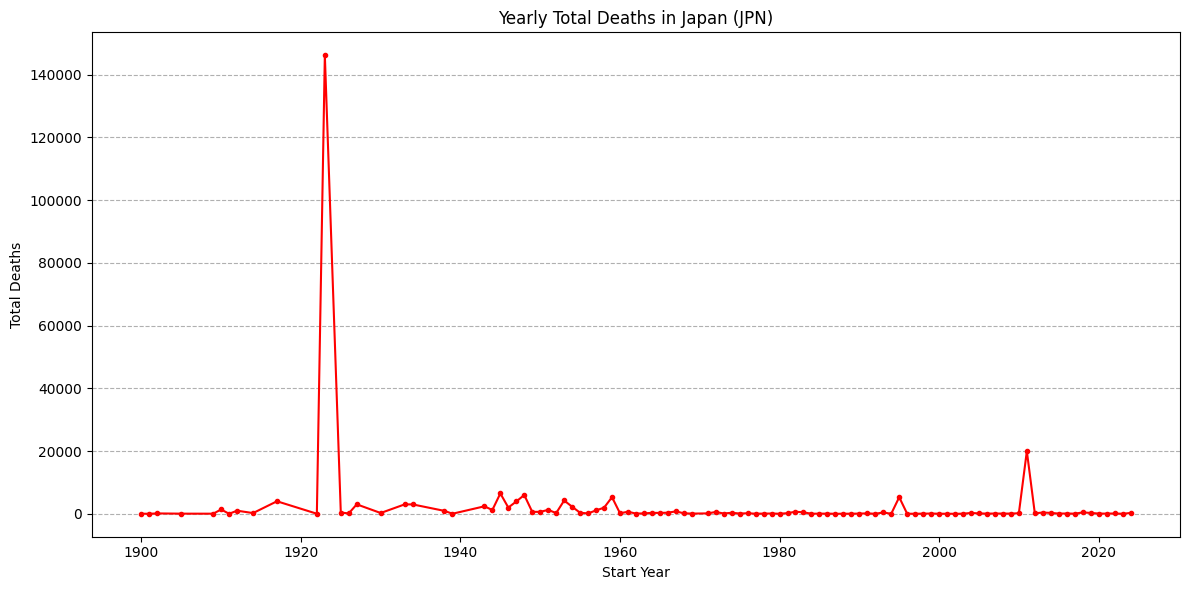

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------
# 1. データの読み込み
# -----------------
# ファイル名が 'safariPreRFC8187-UTF-8''emdat.csv' であることを確認してください
file_path = 'emdat.csv'
try:
    df = pd.read_csv(file_path)
    print("✅ データを正常に読み込みました。\n")
except FileNotFoundError:
    print(f"❌ エラー: ファイル '{file_path}' が見つかりません。ファイル名を確認してください。")
    exit()

# -----------------
# 2. データの準備とクリーンアップ
# -----------------
# 'Total Deaths' (死亡者総数) の欠損値を 0 で埋めます
df['Total Deaths'] = df['Total Deaths'].fillna(0)

# 'Total Deaths' が数値型であることを確認します（念のため型を変換）
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce').fillna(0).astype(int)

# 'Start Year' (開始年) が数値型であることを確認します
df['Start Year'] = pd.to_numeric(df['Start Year'], errors='coerce').fillna(0).astype(int)

# -----------------
# 3. 災害サブグループ別の死亡者数分析
# -----------------
print("## 1. 災害サブグループ別 死亡者総数 TOP 5 ##")

# Disaster Subgroup ごとに Total Deaths の合計を計算し、降順でソートします
deaths_by_subgroup = df.groupby('Disaster Subgroup')['Total Deaths'].sum().sort_values(ascending=False)

print(deaths_by_subgroup.head())

# 結果を棒グラフで可視化します
plt.figure(figsize=(10, 6))
deaths_by_subgroup.head(5).plot(kind='bar', color='skyblue')
plt.title('Total Deaths by Disaster Subgroup (Top 5)')
plt.xlabel('Disaster Subgroup')
plt.ylabel('Total Deaths (Millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# -----------------
# 4. 特定の国 (日本/ISO: JPN) の経年変化分析
# -----------------
print("\n## 2. 日本 (JPN) の年別 死亡者数推移 ##")

# 日本 (ISOコード: JPN) のデータのみをフィルタリング
df_jpn = df[df['ISO'] == 'JPN']

# Start Year ごとに Total Deaths の合計を計算します
yearly_deaths_jpn = df_jpn.groupby('Start Year')['Total Deaths'].sum()

print(yearly_deaths_jpn[yearly_deaths_jpn > 0].tail()) # 死亡者数があった年のみ表示

# 結果を折れ線グラフで可視化します
plt.figure(figsize=(12, 6))
yearly_deaths_jpn.plot(kind='line', marker='o', linestyle='-', color='red', markersize=3)
plt.title('Yearly Total Deaths in Japan (JPN)')
plt.xlabel('Start Year')
plt.ylabel('Total Deaths')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

・Climatological Data Centers (気象災害) と Geophysical Data Centers (地質災害) が死亡者数の多いサブグループである。
・1920年代から1940年代にかけて死亡者数が多い傾向が見られる。